In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\dell\Downloads\archive (2)\Superstore_USA.xlsx")

In [3]:
df.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [4]:
df.shape

(9426, 24)

In [5]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [6]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)

In [7]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [8]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [9]:
df['Order Priority'] = df['Order Priority'].replace("Critical ","Critical")

In [10]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

# Order Priority

In [11]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

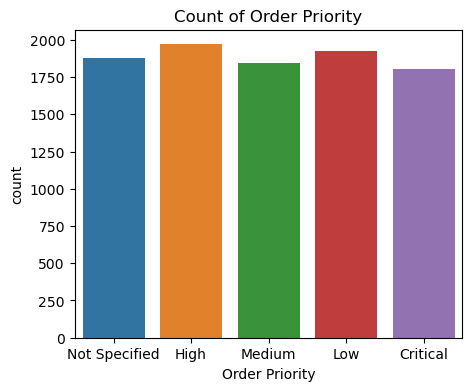

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority", data = df)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

# Ship Mode

In [13]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [14]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

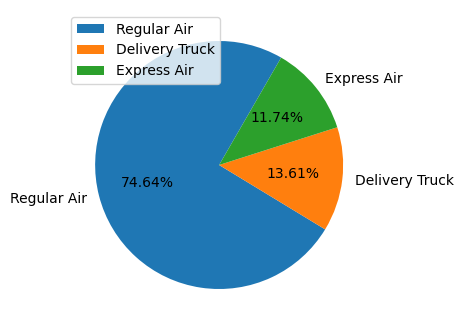

In [15]:
plt.figure(figsize=(4,6))
plt.pie(y,labels=x,startangle = 60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

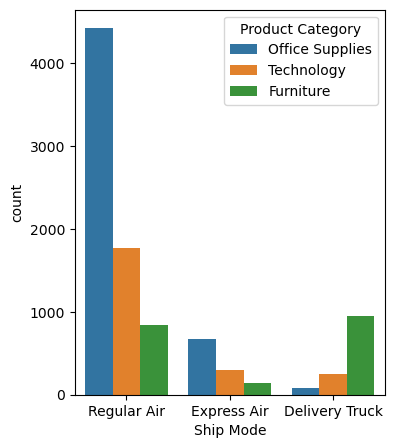

In [16]:
plt.figure(figsize=(4,5))
sns.countplot(x="Ship Mode", data = df, hue="Product Category")
plt.show()

# Customer Segment

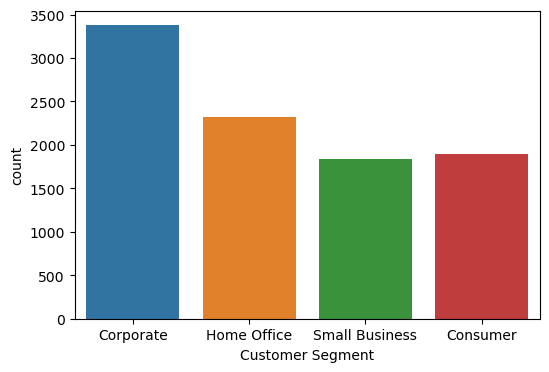

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment", data=df)
plt.show()

# Product Category

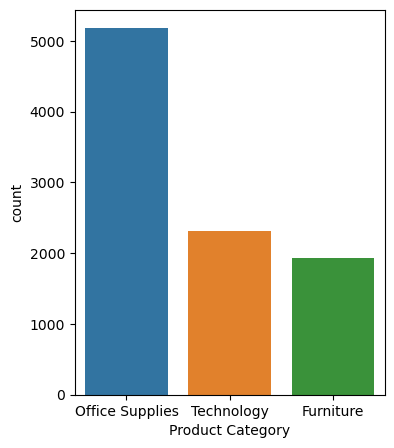

In [18]:
plt.figure(figsize=(4,5))
sns.countplot(x="Product Category", data = df)
plt.show()

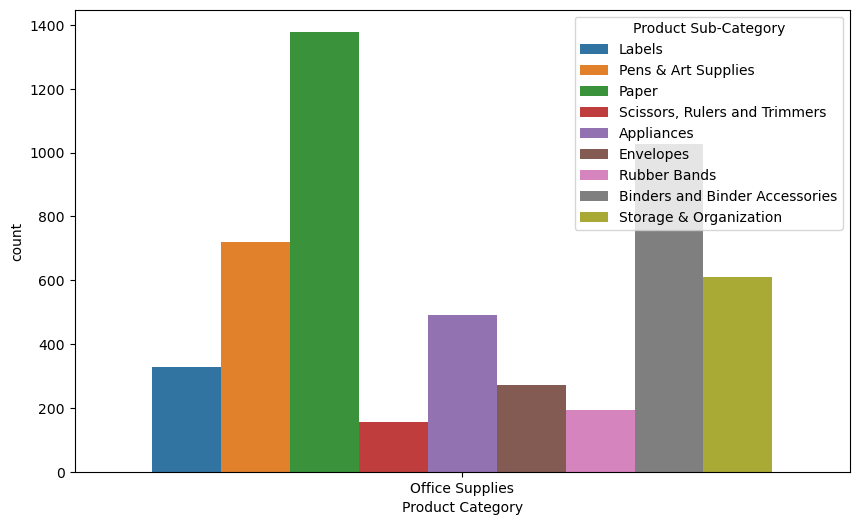

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data = df[df["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.show()

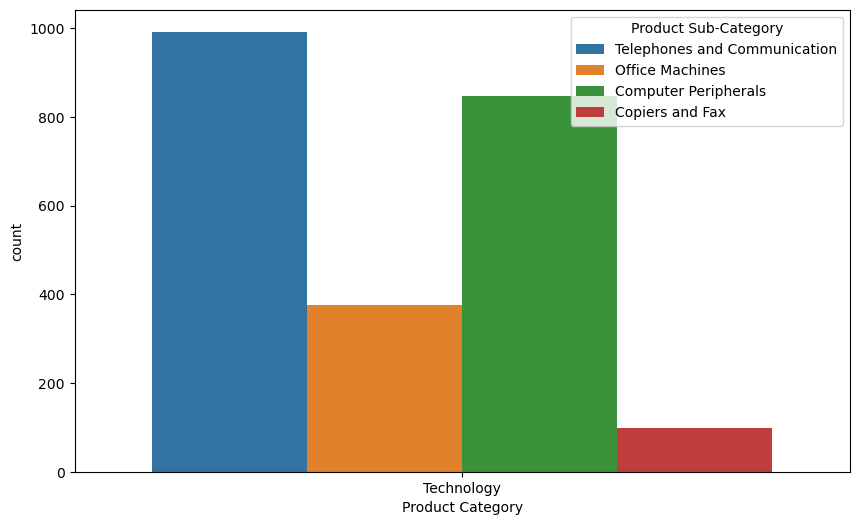

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data = df[df["Product Category"]=="Technology"],hue="Product Sub-Category")
plt.show()

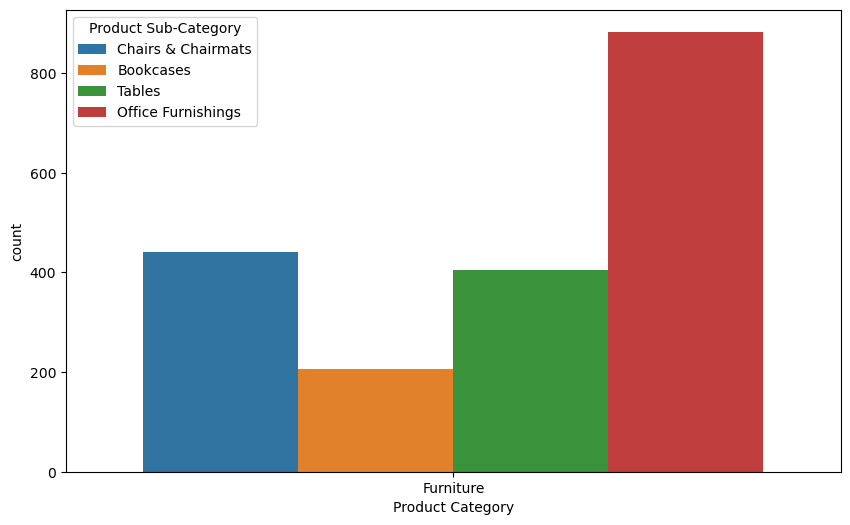

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data = df[df["Product Category"]=="Furniture"],hue="Product Sub-Category")
plt.show()

# Order Date

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [25]:
df["Order Year"] = df["Order Date"].dt.year

In [26]:
df["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

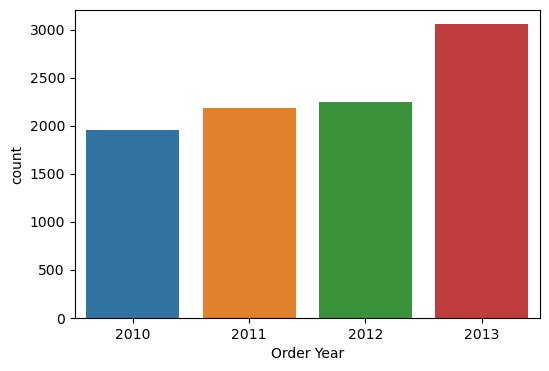

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order Year",data = df)
plt.show()

# Profit

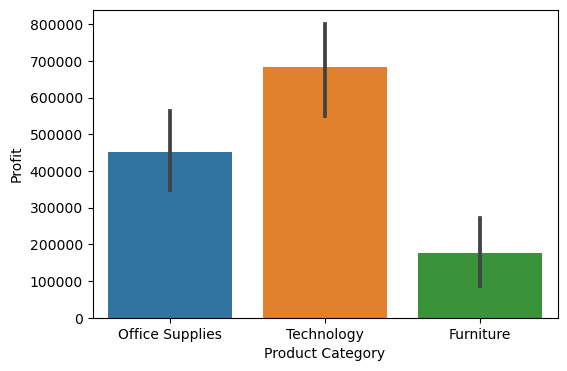

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Profit",data=df,estimator="sum")
plt.show()

In [31]:
df["State or Province"].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

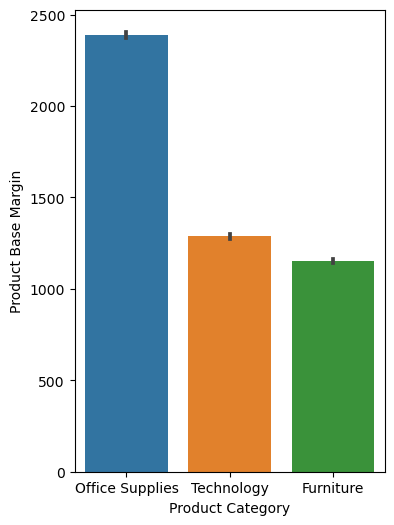

In [33]:
plt.figure(figsize=(4,6))
sns.barplot(x="Product Category",y="Product Base Margin",data = df,estimator="sum")
plt.show()